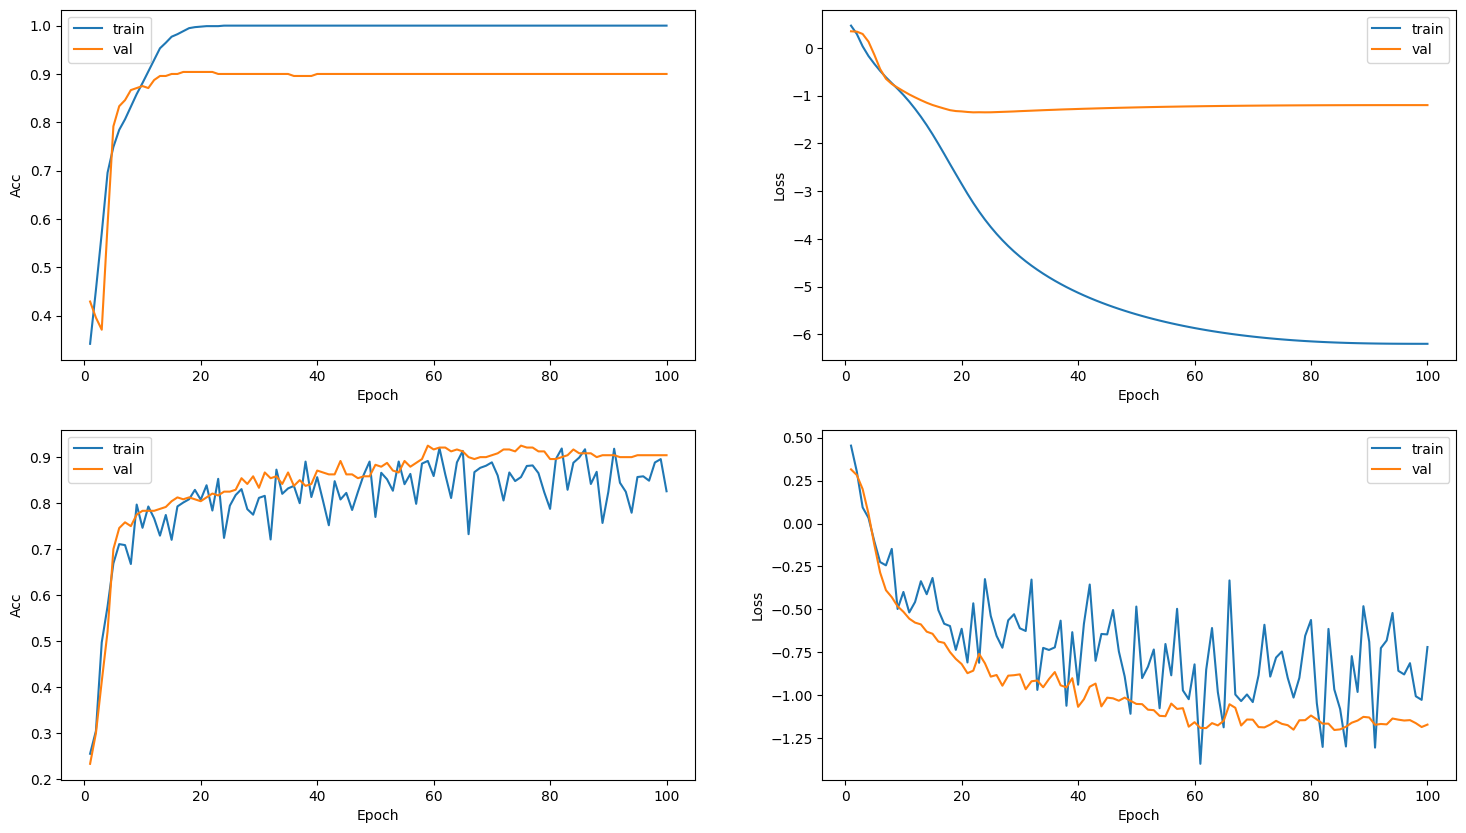

In [23]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

path = "/root/app/competition_hist_0428_142800.csv"
path2 = "/root/app/competition_hist_0428_143832.csv"

df = pd.read_csv(path)
df2 = pd.read_csv(path2)

def plot_ax(x, y, axes, legend=None, label=False):
    if label:
        axes.set_xlabel(x.name)
        axes.set_ylabel(y.name)

    axes.plot(x, y, label=legend)

    if legend is not None: axes.legend()


fig = plt.figure(dpi=100, figsize=(18, 10))
ax1 = fig.add_subplot(2, 2, 1)    # 1行2列の1番目
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plot_ax(df["Epoch"], df["Acc"], ax1, legend="train", label=True)
plot_ax(df["Epoch"], df["vAcc"], ax1, legend="val")

plot_ax(df["Epoch"], np.log(df["Loss"]), ax2, legend="train", label=True)
plot_ax(df["Epoch"], np.log(df["vLoss"]), ax2, legend="val")

plot_ax(df2["Epoch"], df2["Acc"], ax3, legend="train", label=True)
plot_ax(df2["Epoch"], df2["vAcc"], ax3, legend="val")

plot_ax(df2["Epoch"], np.log(df2["Loss"]), ax4, legend="train", label=True)
plot_ax(df2["Epoch"], np.log(df2["vLoss"]), ax4, legend="val")


plt.show()